# Capstone Project | Fake and Real News Classification

## Initial Data Exploration


### A. PRELIMINARY SET-UP

In [86]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re
import gensim

In [145]:
df_fake = pd.read_csv('fake.csv')
df_real = pd.read_csv('true.csv')

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### B. DATA VISUALIZATION

### 1. SUBJECT OF ARTICLES**

**FAKE NEWS SUBJECT**:
    1. News
    2. politics
    3. Government News
    4. left-news
    5. US_News
    6. Middle-ease
 
According to the exploratory analysis, subjects of fake news articles are not balanced among the data.

**REAL NEWS SUBJECT**:
    1. politicsNews
    2. worldnews
    
The sample sizes among these two news subject are balanced

Fake news sample: 21417
Obervation distribution in Fake Subject of real news article (%):
News               39.0
politics           29.0
left-news          19.0
Government News     7.0
US_News             3.0
Middle-east         3.0
Name: subject, dtype: float64


Text(0.5, 1.0, 'Fake News Subjects')

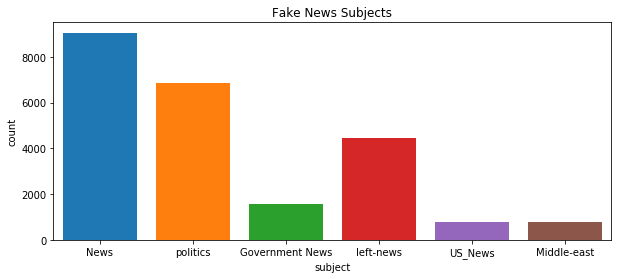

In [84]:
print('Fake news sample:',len(df_real))
print('Obervation distribution in Fake Subject of real news article (%):')
print(round(df_fake.subject.value_counts()/len(df_fake.subject)*100))
plt.figure(figsize=(10,4))
sns.countplot(x='subject', data=df_fake, saturation=1).set_title('Fake News Subjects')

Real news sample: 21417
Obervation distribution in Subject of real news article (%):
politicsNews    48.0
worldnews       43.0
Name: subject, dtype: float64


Text(0.5, 1.0, 'Real News Subjects')

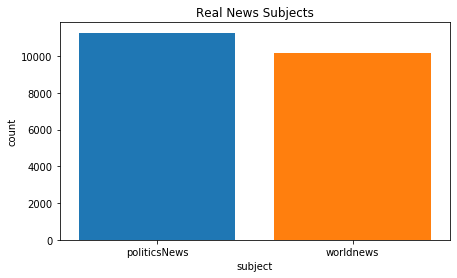

In [85]:
print('Real news sample:',len(df_real))
print('Obervation distribution in Subject of real news article (%):')
print(round(df_real.subject.value_counts()/len(df_fake.subject)*100))
plt.figure(figsize=(7,4))
sns.countplot(x='subject', data=df_real, saturation=1).set_title('Real News Subjects')

### WORDCLOUD of Title

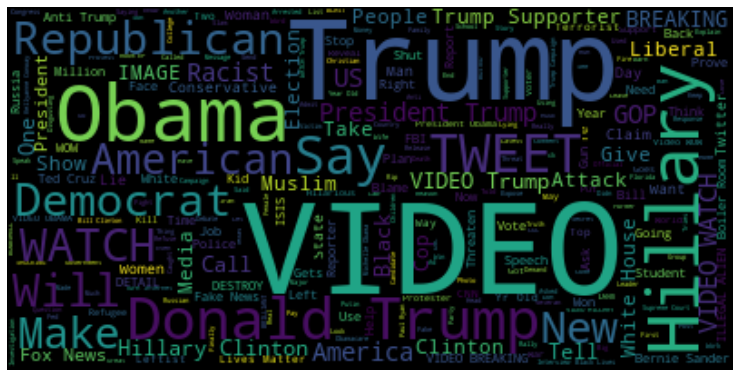

In [103]:
# FAKE NEWS TITLE WORDCLOUD
text = ' '.join(df_fake['title'])
from wordcloud import WordCloud, STOPWORDS
wordCloud_title = WordCloud(background_color='black',
                           max_words=len(text)).generate(text)
plt.figure(figsize=(13,8))
plt.clf()
plt.imshow(wordCloud_title, interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('fake_title.png')
plt.show()

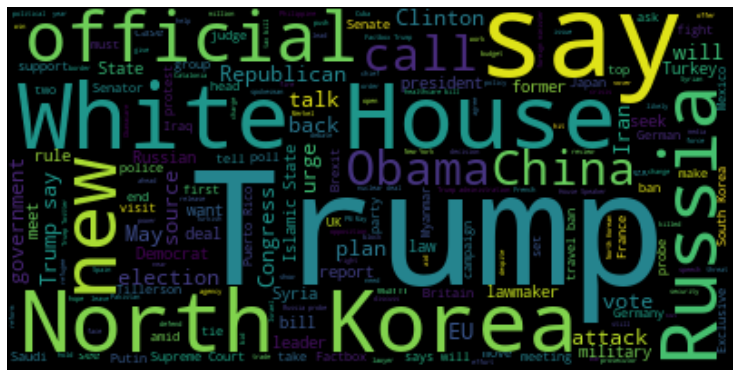

In [104]:
# TRUE NEWS TITLE WORDCLOUD
text = ' '.join(df_real['title'])
from wordcloud import WordCloud, STOPWORDS
wordCloud_title = WordCloud(background_color='black',
                           max_words=len(text)).generate(text)
plt.figure(figsize=(13,8))
plt.clf()
plt.imshow(wordCloud_title, interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('fake_title.png')
plt.show()

The words cloud has shown that the title of fake news tend to mention VIDEO, TRUMP, HILLARY, OBAMA, REPUBLICAN, SAY, TWEET, SAY. These words tends to indicate gossips or tabloid stories and do not relate to any political situation yet just to mention the fame of world leaders.

At the same time, the real news tend to mention TRUMP, WHITE HOURSE, OFFICIAL, NEW, NORTH KOREA,RUSSIAN, SAY, CALL. These titles stress serious political issues such as North Korea, Official, Russia, White House, China, Obama, Trump

### WORDCLOUD of Text (NEWS)

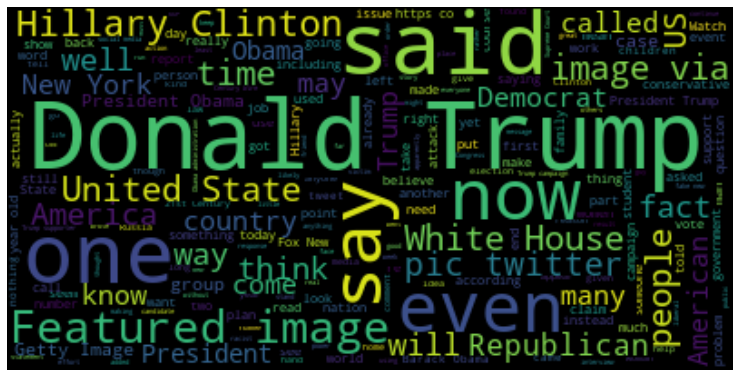

In [105]:
# FAKE NEWS WORDCLOUD
text = ' '.join(df_fake['text'])
from wordcloud import WordCloud, STOPWORDS
wordCloud_title = WordCloud(background_color='black',
                           max_words=len(text)).generate(text)
plt.figure(figsize=(13,8))
plt.clf()
plt.imshow(wordCloud_title, interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('fake_title.png')
plt.show()

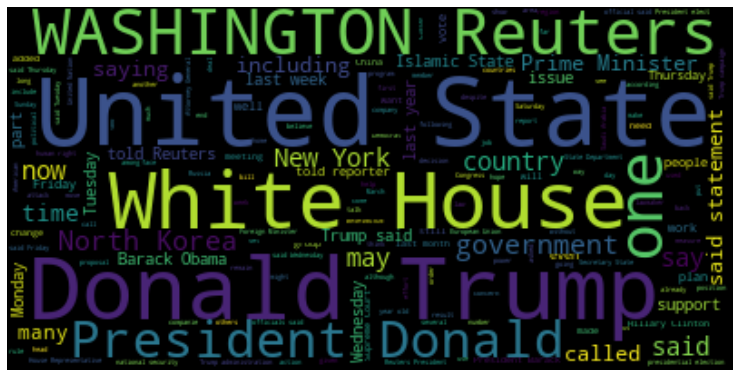

In [106]:
# TRUE NEWS WORDCLOUD
text = ' '.join(df_real['text'])
from wordcloud import WordCloud, STOPWORDS
wordCloud_title = WordCloud(background_color='black',
                           max_words=len(text)).generate(text)
plt.figure(figsize=(13,8))
plt.clf()
plt.imshow(wordCloud_title, interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.savefig('fake_title.png')
plt.show()

When generating WordCloud for Fake News and Real News, the difference are perfectly clear. Fake News tens to mention keywords relating to gossiping such as "say", "said", "image" or famous people with a bad fame such as "Donald Trump" or "Hillary Clinton". On the contrary, Real News tend to focus on country, places, city, president name, such as WASHINGTON, UNITED STATE, WHITE HOUSE, NEW YORK, PRESIDENT, DONALD TRUMP, ....etc

### NUMBER OF WORDS IN TITLE | KERNEL DISTRIBUTION

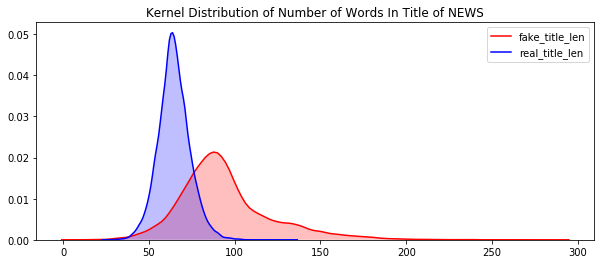

In [148]:
# Calculate the title of news
df_fake['fake_title_len'] = df_fake.title.apply(lambda x: len(x))
df_real['real_title_len'] = df_real.title.apply(lambda x:len(x))

# Kernel Distribution of Number of Words
plt.figure(1,figsize=(10,4))
p1 = sns.kdeplot(df_fake['fake_title_len'], shade=True, color="r").set_title("Kernel Distribution of Number of Words In Title of NEWS")
p1 = sns.kdeplot(df_real['real_title_len'], shade=True, color="b")

Comparing the nubmer of words between title of fake news and real news, we can find that:
- fake news tend to have title length spreading from 0 to less than 150 and peak from 50 to 60
- the real news title length tend to spread from 0 to 300 and peak at 80 to 90

### NUMBER OF WORDS IN THE NEWS | KERNEL DISTRIBUTION

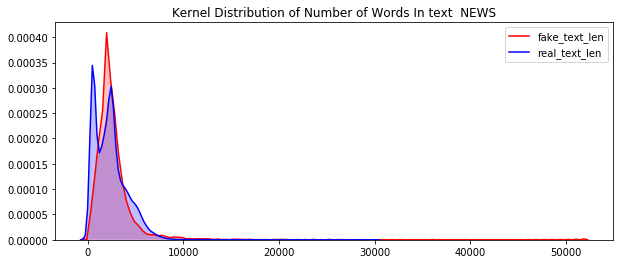

In [147]:
# NUMBER OF WORDS IN THE NEWS
# Calculate the title of news
df_fake['fake_text_len'] = df_fake.text.apply(lambda x: len(x))
df_real['real_text_len'] = df_real.text.apply(lambda x:len(x))

# Kernel Distribution of Number of Words
plt.figure(1,figsize=(10,4))
p2 = sns.kdeplot(df_fake['fake_text_len'], shade=True, color="r").set_title("Kernel Distribution of Number of Words In text  NEWS")
p2 = sns.kdeplot(df_real['real_text_len'], shade=True, color="b")

# Statistic on Length of Words

In [152]:
df_fake.describe()

,fake_title_len,fake_text_len
count,23481.000000,23481.000000
mean,94.198032,2547.396235
std,27.184433,2532.884399
min,8.000000,1.000000
25%,77.000000,1433.000000
50%,90.000000,2166.000000
75%,105.000000,3032.000000
max,286.000000,51794.000000


In [153]:
df_real.describe()

,real_title_len,real_text_len
count,21417.000000,21417.000000
mean,64.667881,2383.278517
std,9.168999,1684.835730
min,26.000000,1.000000
25%,59.000000,914.000000
50%,64.000000,2222.000000
75%,70.000000,3237.000000
max,133.000000,29781.000000


In [155]:
df_fake.title.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
23476    False
23477    False
23478    False
23479    False
23480    False
Name: title, Length: 23481, dtype: bool

# STEMMING AND PART OF SPEECH TAGGING

In [156]:
from nltk.corpus import stopwords
from nltk import FreqDist

In [166]:
# Joining all the text of news into a full file
fake_text = ' '.join(df_fake.text)
real_text = ' '.join(df_real.text)

# Tokenization
fake_text_tokens = nltk.word_tokenize(fake_text)
real_text_tokens = nltk.word_tokenize(real_text)

# Stopwords removal and only keep text data then change to lower case
mystopwords = stopwords.words('english')
fake_words = [w.lower() for w in fake_text_tokens if w.isalpha() if w.lower() not in mystopwords]
real_words = [w.lower() for w in real_text_tokens if w.isalpha() if w.lower() not in mystopwords]

In [167]:
print('FAKE NEWS TOKENS:', len(fake_text_tokens))
print('FAKE NEWS WORDS:', len(fake_words))
print('\n')
print('REAL NEWS TOKENS:', len(real_text_tokens))
print('REAL NEWS WORDS:', len(real_words))

FAKE NEWS TOKENS: 11029450
FAKE NEWS WORDS: 5173390


REAL NEWS TOKENS: 9319901
REAL NEWS WORDS: 4690887


**Stemming: WordNet Lemmatizer**

In [168]:
# Stemming
wnl = nltk.WordNetLemmatizer()
# Stemming for Fake News
fake_stem = [wnl.lemmatize(w) for w in fake_words]
fake_freq = FreqDist(fake_stem)
sorted_fake_freq = sorted(fake_freq.items(),
                         key = lambda k:k[1],
                         reverse=True)
# Stemming for Real News
real_stem = [wnl.lemmatize(w) for w in real_words]
real_freq = FreqDist(real_stem)
sorted_real_freq = sorted(real_freq.items(),
                         key = lambda k:k[1],
                         reverse=True)

In [197]:
print('TOP 30 WORDS IN FAKE NEWS')
print(sorted_fake_freq[:30])
print('\n')
print('TOP 30 WORDS IN REAL NEWS')
print(sorted_real_freq[:30])

TOP 30 WORDS IN FAKE NEWS
[('trump', 74395), ('said', 31145), ('president', 26307), ('people', 26094), ('one', 23809), ('would', 23461), ('state', 22071), ('clinton', 18711), ('like', 18207), ('obama', 17919), ('time', 17883), ('donald', 17234), ('american', 16090), ('republican', 16058), ('say', 15520), ('also', 15242), ('year', 14841), ('new', 14198), ('news', 14195), ('u', 14176), ('image', 13934), ('even', 13691), ('hillary', 13678), ('white', 13146), ('right', 12689), ('get', 12230), ('know', 11946), ('make', 11531), ('via', 11353), ('woman', 11205)]


TOP 30 WORDS IN REAL NEWS
[('said', 99032), ('trump', 54268), ('state', 36230), ('would', 31524), ('reuters', 28410), ('president', 26928), ('republican', 22094), ('government', 19429), ('year', 18710), ('house', 16900), ('new', 16783), ('also', 15946), ('united', 15576), ('people', 15193), ('party', 14963), ('official', 14575), ('told', 14244), ('country', 13924), ('election', 13900), ('could', 13707), ('one', 13018), ('last', 1263

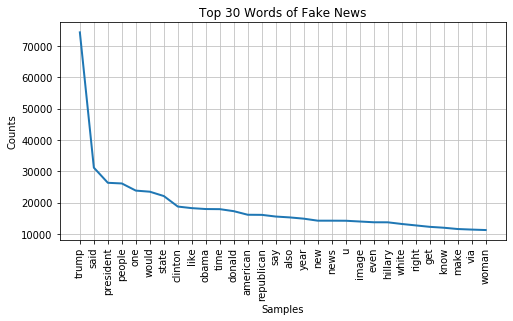

In [188]:
plt.figure(figsize=(8,4))
fake_freq.plot(30, title = 'Top 30 Words of Fake News')

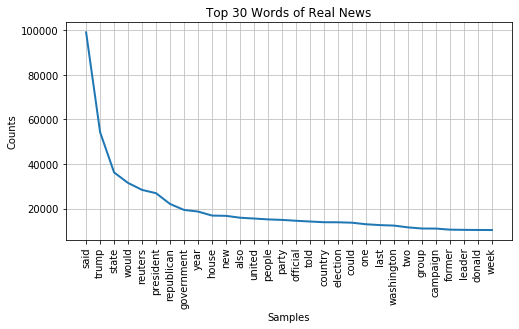

In [183]:
plt.figure(figsize=(8,4))
real_freq.plot(30, title='Top 30 Words of Real News')

**POS Tagging**

In [198]:
# Generate a list of POS tags
POS_tags_fake = nltk.pos_tag(fake_text_tokens)
POS_tags_real = nltk.pos_tag(real_text_tokens)

In [204]:
# Keep tags that start with 'N'
POS_tag_listN_fake = [(word,tag) for (word,tag) in POS_tags_fake if tag == 'NNP']
POS_tag_listN_real = [(word,tag) for (word,tag) in POS_tags_real if tag == 'NNP']

In [205]:
# Generate a frequency distribution
tag_freq_fake_POS = nltk.FreqDist(POS_tag_listN_fake)
sorted_freq_fake_POS = sorted(tag_freq_fake_POS.items(),
                             key = lambda k:k[1],
                             reverse = True)
tag_freq_real_POS = nltk.FreqDist(POS_tag_listN_real)
sorted_freq_real_POS = sorted(tag_freq_real_POS.items(),
                             key = lambda k:k[1],
                             reverse = True)

In [213]:
sorted_freq_fake_POS[:30]

[(('Trump', 'NNP'), 71424),
 (('@', 'NNP'), 22418),
 (('Clinton', 'NNP'), 17936),
 (('Obama', 'NNP'), 17681),
 (('Donald', 'NNP'), 17167),
 (('President', 'NNP'), 16469),
 (('Hillary', 'NNP'), 13032),
 (('America', 'NNP'), 10507),
 (('House', 'NNP'), 9551),
 (('U.S.', 'NNP'), 7817),
 (('United', 'NNP'), 7782),
 (('White', 'NNP'), 7512),
 (('News', 'NNP'), 7144),
 (('New', 'NNP'), 6819),
 (('Republican', 'NNP'), 6392),
 (('US', 'NNP'), 6370),
 (('FBI', 'NNP'), 5569),
 (('Washington', 'NNP'), 5450),
 (('Russia', 'NNP'), 5115),
 (('State', 'NNP'), 5110),
 (('Department', 'NNP'), 4659),
 (('CNN', 'NNP'), 4371),
 (('York', 'NNP'), 4307),
 (('GOP', 'NNP'), 4200),
 (('Fox', 'NNP'), 4105),
 (('Twitter', 'NNP'), 4007),
 (('John', 'NNP'), 3846),
 (('January', 'NNP'), 3473),
 (('Congress', 'NNP'), 3459),
 (('Images', 'NNP'), 3444)]

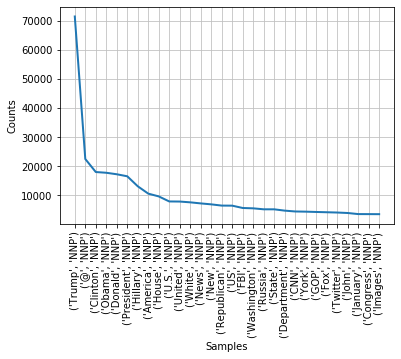

In [215]:
tag_freq_fake_POS.plot(30)

In [216]:
sorted_freq_real_POS[:30]

[(('Trump', 'NNP'), 53018),
 (('’', 'NNP'), 51852),
 (('U.S.', 'NNP'), 36965),
 (('”', 'NNP'), 26454),
 (('Reuters', 'NNP'), 22191),
 (('President', 'NNP'), 17409),
 (('House', 'NNP'), 15363),
 (('United', 'NNP'), 15048),
 (('Donald', 'NNP'), 10442),
 (('Republican', 'NNP'), 10199),
 (('Clinton', 'NNP'), 9443),
 (('Obama', 'NNP'), 9184),
 (('“', 'NNP'), 9123),
 (('Senate', 'NNP'), 9107),
 (('China', 'NNP'), 8557),
 (('White', 'NNP'), 8522),
 (('Tuesday', 'NNP'), 8259),
 (('Wednesday', 'NNP'), 8006),
 (('Thursday', 'NNP'), 7657),
 (('State', 'NNP'), 7587),
 (('North', 'NNP'), 7543),
 (('Russia', 'NNP'), 7535),
 (('Friday', 'NNP'), 7322),
 (('Korea', 'NNP'), 7232),
 (('Monday', 'NNP'), 7091),
 (('WASHINGTON', 'NNP'), 6511),
 (('New', 'NNP'), 6383),
 (('Congress', 'NNP'), 6090),
 (('Washington', 'NNP'), 5907),
 (('Iran', 'NNP'), 5425)]

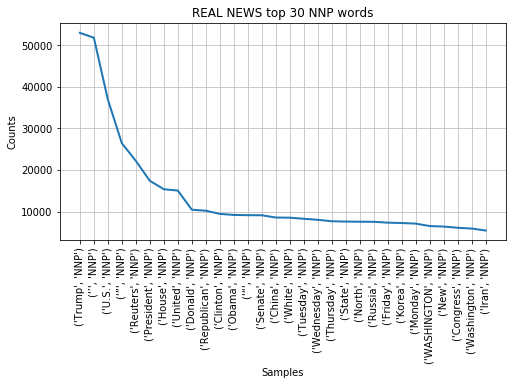

In [220]:
plt.figure(figsize=(8,4))
tag_freq_real_POS.plot(30, title='REAL NEWS top 30 NNP words')